In [5]:
import matplotlib.pyplot as plt

from bag_utils import get_bagvalues

# Bag tuples
bag_dir = "/home/lukas/Code/data_qolo/marketplace_lausanne_2022_01_28/"

bag_tuples = [
    # Does one loop (to far away), slow velocity ~ 0.4, important is the start
    ("2022-01-28-13-50-27.bag", "Sampled slow"),
    # Goes back and forwards once
    ("2022-01-28-13-33-32.bag", "Sampled"),
    ("2022-01-28-13-20-25.bag", "Sampled"),  # Very short -> nonusefull
    ("2022-01-28-13-20-46.bag", "Sampled"),
    ("2022-01-28-14-00-39.bag", "Sampled"),
    ("2022-01-28-14-03-04.bag", "Sampled"),
    ("2022-01-28-14-08-47.bag", "Sampled"),
]
bag_names = [name for name, _ in bag_tuples]
experiment_id = [name[-9:-7] + name[-6:-4] for name, _ in bag_tuples]
detection_type = [dettype for _, dettype in bag_tuples]


In [22]:
from bag_utils import print_topics
print_topics()

05-05 00:58 root         INFO     Printing topics


/diagnostics diagnostic_msgs/msg/DiagnosticArray
/front_lidar/scan sensor_msgs/msg/LaserScan
/diagnostics diagnostic_msgs/msg/DiagnosticArray
/qolo/compliance/svr geometry_msgs/msg/WrenchStamped
/qolo/emergency std_msgs/msg/Bool
/qolo/remote_commands std_msgs/msg/Float32MultiArray
/qolo/pose2D geometry_msgs/msg/Pose2D
/rosout rosgraph_msgs/msg/Log
/rear_lidar/scan sensor_msgs/msg/LaserScan
/qolo/twist geometry_msgs/msg/TwistStamped
/qolo/odom nav_msgs/msg/Odometry
/front_lidar/velodyne_points sensor_msgs/msg/PointCloud2
/front_lidar/scan_all sensor_msgs/msg/LaserScan
/qolo/user_commands std_msgs/msg/Float32MultiArray
/rokubi_node_front/ft_sensor_measurements geometry_msgs/msg/WrenchStamped
/rosout rosgraph_msgs/msg/Log
/rosout rosgraph_msgs/msg/Log
/rear_lidar/velodyne_points sensor_msgs/msg/PointCloud2
/t265/accel/imu_info realsense2_camera/msg/IMUInfo
/rosout_agg rosgraph_msgs/msg/Log
/rosout rosgraph_msgs/msg/Log
/rosout rosgraph_msgs/msg/Log
/rosout rosgraph_msgs/msg/Log
/rear_lida

In [10]:
import os
import logging

#import_list = [0, 1, 3]
import_list = None
logging.info("Default importing in progress...")

## Values
logging.info("Start data-importing.")
recording_list = []
for ii, bagname in enumerate(bag_names):
    if import_list is not None and not ii in import_list:
        recording_list.append(None)
        continue

    bagname_dir = os.path.join(bag_dir, bagname)

    recording_list.append(get_bagvalues(bagname_dir))

logging.info("Done importing.")


05-06 14:59 root         INFO     Default importing in progress...
05-06 14:59 root         INFO     Start data-importing.


IndexError: list index out of range

In [2]:
import matplotlib.pyplot as plt

fig, axs_pos = plt.subplots(2, len(recording_list), figsize=(14, 6))
fig, axs_vel = plt.subplots(2, len(recording_list), figsize=(14, 5))

for ii, record in enumerate(recording_list):
    fig, ax = plt.subplots(figsize=(10, 8))
    ax.plot(record['position_x'], record['position_y'])

    axs_pos[0, ii].plot(record['position_x'])
    axs_pos[1, ii].plot(record['position_y'])

    axs_vel[0, ii].plot(record['velocity_x'])
    axs_vel[1, ii].plot(record['velocity_angular'])


NameError: name 'recording_list' is not defined

### Interesting Features
From the above analysis we have following interesting featres [0, 1, 3] 

These will be analysed further

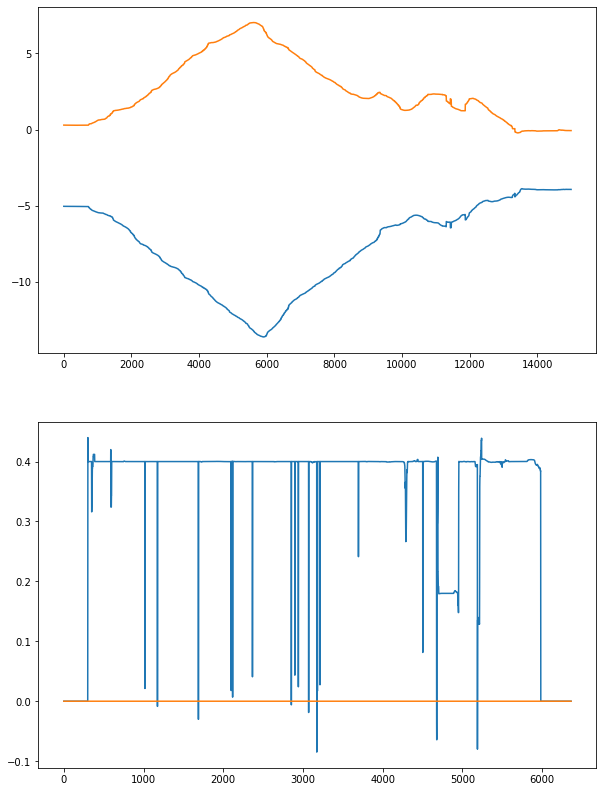

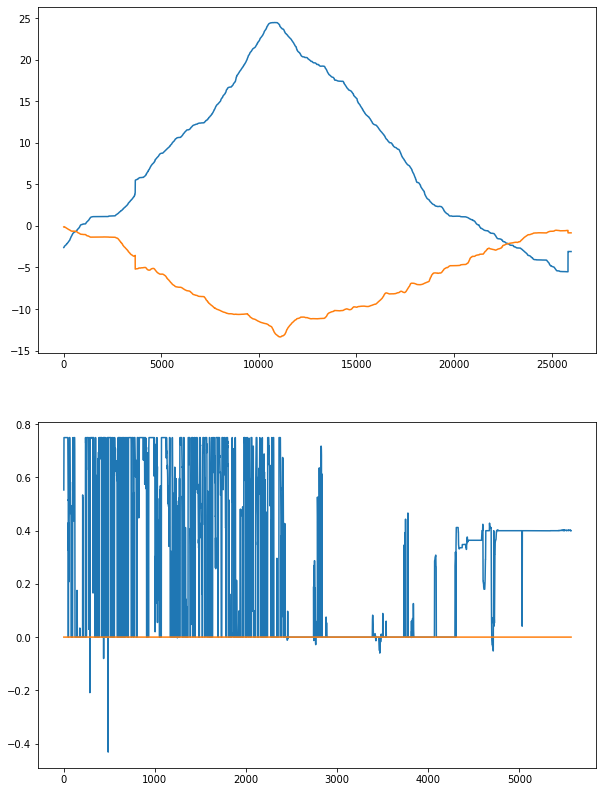

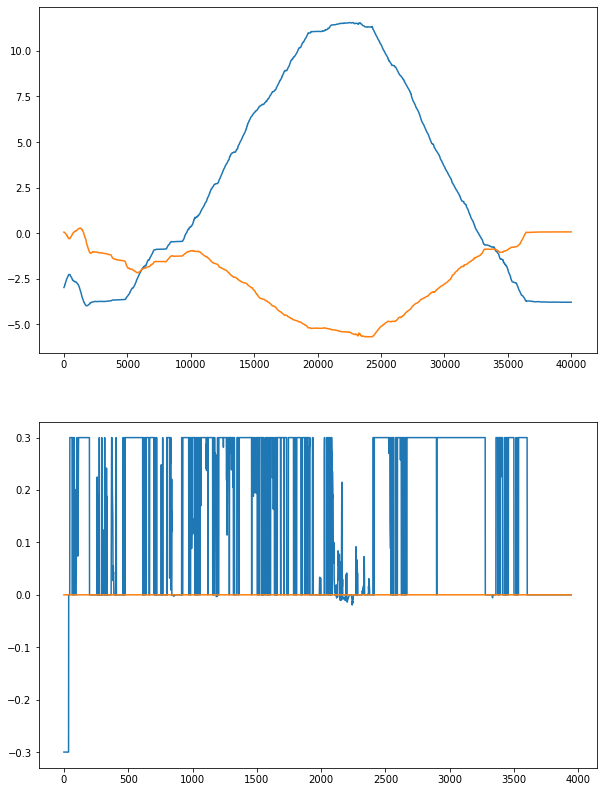

In [22]:
ranges = [None for ii in range(len(recording_list))]
ranges[0] = [0, 15000]
ranges[1] = [0, 26000]
ranges[3] = [0, 40000]

for ii in [0, 1, 3]:
    record = recording_list[ii]
    fig, axs = plt.subplots(2, 1, figsize=(10, 14))

    indmin = ranges[ii][0]
    indmax = ranges[ii][1]

    axs[0].plot(record.position_x[indmin:indmax])
    axs[0].plot(record.position_y[indmin:indmax])

    frac = len(record.velocity_x) / len(record.position_x)
    indmin = int(ranges[ii][0]*frac)
    indmax = int(ranges[ii][1]*frac)
    
    axs[1].plot(record.velocity_x[indmin:indmax])
    axs[1].plot(record.velocity_angular[indmin:indmax])
